In [2]:
# importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from scipy.stats import zscore
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV




In [3]:
#calling student dataset
st=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Grades/Grades.csv')

In [4]:
st

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193


The dataset contains grades scored by students throughout their university tenure in various courses 
and their CGPA calculated based on their grades.
There are 571 rows and 43 columns.

In [5]:
st.head()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448


first 5 rows and 43 columns of dataset

In [6]:
st.tail()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193
570,CS-97571,C,D,D,C,C,D+,B,C+,C,...,C+,C,B-,D,F,C-,B+,D,C-,1.753


Bottom 5 rows and columns.

In [7]:
st.columns.tolist()

['Seat No.',
 'PH-121',
 'HS-101',
 'CY-105',
 'HS-105/12',
 'MT-111',
 'CS-105',
 'CS-106',
 'EL-102',
 'EE-119',
 'ME-107',
 'CS-107',
 'HS-205/20',
 'MT-222',
 'EE-222',
 'MT-224',
 'CS-210',
 'CS-211',
 'CS-203',
 'CS-214',
 'EE-217',
 'CS-212',
 'CS-215',
 'MT-331',
 'EF-303',
 'HS-304',
 'CS-301',
 'CS-302',
 'TC-383',
 'MT-442',
 'EL-332',
 'CS-318',
 'CS-306',
 'CS-312',
 'CS-317',
 'CS-403',
 'CS-421',
 'CS-406',
 'CS-414',
 'CS-419',
 'CS-423',
 'CS-412',
 'CGPA']

Name of all the columns.

In [8]:
st.shape

(571, 43)

count of total rows and columns.That is 571 rows and 43 columns.

In [9]:
st.dtypes

Seat No.      object
PH-121        object
HS-101        object
CY-105        object
HS-105/12     object
MT-111        object
CS-105        object
CS-106        object
EL-102        object
EE-119        object
ME-107        object
CS-107        object
HS-205/20     object
MT-222        object
EE-222        object
MT-224        object
CS-210        object
CS-211        object
CS-203        object
CS-214        object
EE-217        object
CS-212        object
CS-215        object
MT-331        object
EF-303        object
HS-304        object
CS-301        object
CS-302        object
TC-383        object
MT-442        object
EL-332        object
CS-318        object
CS-306        object
CS-312        object
CS-317        object
CS-403        object
CS-421        object
CS-406        object
CS-414        object
CS-419        object
CS-423        object
CS-412        object
CGPA         float64
dtype: object

Dtype of columns.There is only 1 float and all other 42 columns are object dtype.

In [10]:
st.isnull().sum()

Seat No.      0
PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

This shows the present of null values of each columns.

In [11]:
#dropping all null values
#st=st.dropna()

In [12]:
st.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   571 non-null    object 
 1   PH-121     571 non-null    object 
 2   HS-101     571 non-null    object 
 3   CY-105     570 non-null    object 
 4   HS-105/12  570 non-null    object 
 5   MT-111     569 non-null    object 
 6   CS-105     571 non-null    object 
 7   CS-106     569 non-null    object 
 8   EL-102     569 non-null    object 
 9   EE-119     569 non-null    object 
 10  ME-107     569 non-null    object 
 11  CS-107     569 non-null    object 
 12  HS-205/20  566 non-null    object 
 13  MT-222     566 non-null    object 
 14  EE-222     564 non-null    object 
 15  MT-224     564 non-null    object 
 16  CS-210     564 non-null    object 
 17  CS-211     566 non-null    object 
 18  CS-203     566 non-null    object 
 19  CS-214     565 non-null    object 
 20  EE-217    

This gives the overview of the dataset.
The count of rows, columns,present of null values, dtypes which is object only CGPA is float64 dtype.

In [13]:
#converting categorical data into numerical data
enc=OrdinalEncoder()
st[['Seat No.',
 'PH-121',
 'HS-101',
 'CY-105',
 'HS-105/12',
 'MT-111',
 'CS-105',
 'CS-106',
 'EL-102',
 'EE-119',
 'ME-107',
 'CS-107',
 'HS-205/20',
 'MT-222',
 'EE-222',
 'MT-224',
 'CS-210',
 'CS-211',
 'CS-203',
 'CS-214',
 'EE-217',
 'CS-212',
 'CS-215',
 'MT-331',
 'EF-303',
 'HS-304',
 'CS-301',
 'CS-302',
 'TC-383',
 'MT-442',
 'EL-332',
 'CS-318',
 'CS-306',
 'CS-312',
 'CS-317',
 'CS-403',
 'CS-421',
 'CS-406',
 'CS-414',
 'CS-419',
 'CS-423',
 'CS-412',
 'CGPA']]=enc.fit_transform(st[['Seat No.',
 'PH-121',
 'HS-101',
 'CY-105',
 'HS-105/12',
 'MT-111',
 'CS-105',
 'CS-106',
 'EL-102',
 'EE-119',
 'ME-107',
 'CS-107',
 'HS-205/20',
 'MT-222',
 'EE-222',
 'MT-224',
 'CS-210',
 'CS-211',
 'CS-203',
 'CS-214',
 'EE-217',
 'CS-212',
 'CS-215',
 'MT-331',
 'EF-303',
 'HS-304',
 'CS-301',
 'CS-302',
 'TC-383',
 'MT-442',
 'EL-332',
 'CS-318',
 'CS-306',
 'CS-312',
 'CS-317',
 'CS-403',
 'CS-421',
 'CS-406',
 'CS-414',
 'CS-419',
 'CS-423',
 'CS-412',
 'CGPA']])


In [14]:
st

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,0.0,5.0,10.0,8.0,6.0,8.0,10.0,9.0,8.0,5.0,...,8.0,8.0,8.0,8.0,2.0,0.0,8.0,3.0,2.0,72.0
1,1.0,0.0,9.0,10.0,9.0,5.0,6.0,9.0,0.0,10.0,...,10.0,9.0,6.0,9.0,2.0,5.0,6.0,6.0,3.0,48.0
2,2.0,0.0,3.0,0.0,5.0,4.0,0.0,5.0,4.0,2.0,...,3.0,3.0,0.0,6.0,0.0,0.0,0.0,2.0,0.0,409.0
3,3.0,9.0,7.0,10.0,9.0,9.0,2.0,10.0,8.0,9.0,...,10.0,6.0,10.0,8.0,5.0,3.0,7.0,7.0,7.0,33.0
4,4.0,2.0,2.0,2.0,4.0,0.0,0.0,2.0,4.0,0.0,...,5.0,4.0,4.0,5.0,2.0,0.0,2.0,2.0,0.0,365.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,566.0,3.0,0.0,0.0,2.0,1.0,0.0,2.0,2.0,1.0,...,2.0,2.0,0.0,0.0,0.0,4.0,4.0,3.0,0.0,459.0
567,567.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,4.0,4.0,0.0,0.0,2.0,3.0,2.0,6.0,2.0,457.0
568,568.0,3.0,0.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,...,2.0,3.0,0.0,4.0,0.0,6.0,4.0,2.0,2.0,369.0
569,569.0,0.0,4.0,9.0,0.0,9.0,10.0,5.0,8.0,5.0,...,9.0,3.0,3.0,8.0,9.0,6.0,3.0,5.0,6.0,70.0


Checking the data after converting it into float.

In [15]:
#filling null values 
st=st.fillna(0)
print(st)

     Seat No.  PH-121  HS-101  CY-105  HS-105/12  MT-111  CS-105  CS-106  \
0         0.0     5.0    10.0     8.0        6.0     8.0    10.0     9.0   
1         1.0     0.0     9.0    10.0        9.0     5.0     6.0     9.0   
2         2.0     0.0     3.0     0.0        5.0     4.0     0.0     5.0   
3         3.0     9.0     7.0    10.0        9.0     9.0     2.0    10.0   
4         4.0     2.0     2.0     2.0        4.0     0.0     0.0     2.0   
..        ...     ...     ...     ...        ...     ...     ...     ...   
566     566.0     3.0     0.0     0.0        2.0     1.0     0.0     2.0   
567     567.0     1.0     0.0     0.0        0.0     0.0     0.0     0.0   
568     568.0     3.0     0.0     2.0        4.0     0.0     0.0     0.0   
569     569.0     0.0     4.0     9.0        0.0     9.0    10.0     5.0   
570     570.0     6.0     9.0     9.0        6.0     6.0    10.0     3.0   

     EL-102  EE-119  ...  CS-312  CS-317  CS-403  CS-421  CS-406  CS-414  \
0       8.0

<Axes: >

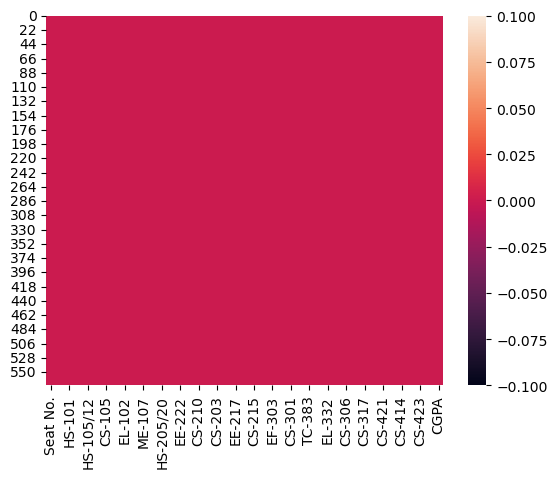

In [16]:
sns.heatmap(st.isnull())

Visualizating null value data through heat map.It shows that there are no null values.

In [17]:
st.describe()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
count,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,...,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000
mean,285.000000,3.781086,5.071804,2.898424,4.241681,3.889667,2.838879,4.115587,3.952715,3.879159,...,4.054291,4.730298,3.432574,5.322242,2.686515,2.397548,3.810858,3.917688,2.772329,247.474606
std,164.977776,3.046895,2.785317,2.964737,3.200507,2.995332,2.696709,2.735206,3.038271,2.665130,...,3.380885,2.826710,2.980685,2.816838,2.680955,2.499388,2.436410,2.846707,2.549304,139.373274
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,142.500000,2.000000,3.000000,0.000000,2.000000,2.000000,0.000000,2.000000,2.000000,2.000000,...,1.000000,3.000000,0.000000,3.000000,0.000000,0.000000,2.000000,2.000000,0.000000,129.500000
50%,285.000000,3.000000,5.000000,2.000000,4.000000,4.000000,2.000000,4.000000,3.000000,3.000000,...,3.000000,5.000000,3.000000,5.000000,2.000000,2.000000,4.000000,4.000000,2.000000,247.000000
75%,427.500000,6.000000,7.000000,4.500000,7.000000,6.000000,4.000000,5.000000,6.000000,6.000000,...,7.000000,7.000000,5.000000,7.000000,4.000000,4.000000,5.000000,6.000000,4.000000,366.000000
max,570.000000,12.000000,11.000000,12.000000,12.000000,12.000000,10.000000,12.000000,12.000000,11.000000,...,13.000000,11.000000,10.000000,12.000000,13.000000,12.000000,11.000000,11.000000,12.000000,490.000000


#This shows the statistical information of the numericalcolumns.

The count of all columns are same as there is missing value. 
The mean value is greater than median(50%) in most of the columns, which means data is skewed to the right. 
There is difference between the max and 75% so there are outliers present in the data. 
The standard deviation,25% percentile value and min can be notice by this describe method.

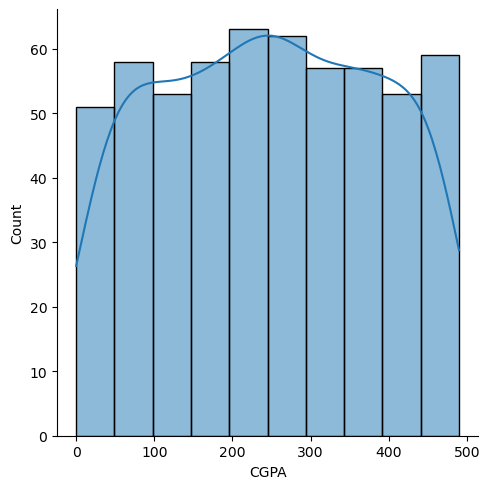

In [18]:
#CGPA of students
sns.displot(st['CGPA'],bins=10,kde=True)

Visualizating CGPA of students through displot.

In [19]:
st.nunique().to_frame('No of unique values')

,No of unique values
Seat No.,571
PH-121,13
HS-101,12
CY-105,13
HS-105/12,13
MT-111,13
CS-105,11
CS-106,13
EL-102,13
EE-119,12


This are the count of unique values of each columns.

In [20]:
st['CGPA'].value_counts(dropna=True)

243.0    5
256.0    3
195.0    3
363.0    3
73.0     3
        ..
132.0    1
55.0     1
154.0    1
56.0     1
14.0     1
Name: CGPA, Length: 491, dtype: int64

Value count of CGPA.

In [21]:
st.groupby('CGPA').mean()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412
CGPA,,,,,,,,,,,,,,,,,,,,,
0.0,565.0,11.0,11.0,9.0,8.0,0.0,10.0,9.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.0,288.0,9.0,8.0,9.0,6.0,9.0,9.0,5.0,11.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2.0,143.0,9.0,9.0,12.0,12.0,12.0,9.0,12.0,12.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3.0,281.0,12.0,10.0,11.0,11.0,11.0,9.0,0.0,9.0,11.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4.0,86.0,9.0,9.0,10.0,5.0,11.0,9.0,9.0,9.0,10.0,...,9.0,10.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
486.0,499.0,1.0,1.0,1.0,1.0,1.0,1.0,4.0,1.0,0.0,...,1.0,1.0,1.0,0.0,0.0,1.0,2.0,0.0,1.0,0.0
487.0,98.0,0.0,4.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,1.0,2.0,0.0,1.0,1.0,0.0,1.0
488.0,498.0,1.0,0.0,1.0,0.0,1.0,1.0,2.0,0.0,0.0,...,1.0,1.0,1.0,0.0,4.0,1.0,0.0,0.0,2.0,1.0


In [22]:
np.mean(st['CGPA'])

247.47460595446586

mean of CGPA.

In [23]:
# dropping invalid column
st.drop(['Seat No.'],axis=1,inplace=True)


In [24]:
st.corr()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
PH-121,1.000000,0.382436,0.557843,0.498561,0.463124,0.609990,0.287444,0.418274,0.574664,0.528325,...,0.029427,0.401343,0.321264,0.246578,0.179080,0.152437,0.427604,0.069319,0.153483,-0.644983
HS-101,0.382436,1.000000,0.335074,0.473132,0.428878,0.400713,0.308408,0.345783,0.305101,0.333310,...,0.208617,0.331803,0.229546,0.275662,0.255817,0.225977,0.266474,0.212052,0.171059,-0.541003
CY-105,0.557843,0.335074,1.000000,0.510123,0.535895,0.578573,0.374864,0.445284,0.460054,0.460852,...,0.250492,0.395732,0.464575,0.295302,0.080083,0.008774,0.388370,0.089016,-0.031152,-0.636770
HS-105/12,0.498561,0.473132,0.510123,1.000000,0.493787,0.482406,0.496622,0.359668,0.395658,0.318756,...,0.255769,0.426281,0.451907,0.378407,0.132137,0.142806,0.437171,0.213617,0.091690,-0.614600
MT-111,0.463124,0.428878,0.535895,0.493787,1.000000,0.387440,0.495571,0.557899,0.407752,0.470601,...,0.461586,0.511589,0.412308,0.475600,0.302416,0.230367,0.476969,0.379568,0.234957,-0.727210
CS-105,0.609990,0.400713,0.578573,0.482406,0.387440,1.000000,0.280099,0.347876,0.501358,0.451648,...,0.051954,0.332149,0.279329,0.196462,0.147577,0.121965,0.276524,0.022722,0.063557,-0.587644
CS-106,0.287444,0.308408,0.374864,0.496622,0.495571,0.280099,1.000000,0.335268,0.260155,0.271443,...,0.444584,0.375718,0.428107,0.366317,0.139885,0.111058,0.398440,0.321849,0.177637,-0.530494
EL-102,0.418274,0.345783,0.445284,0.359668,0.557899,0.347876,0.335268,1.000000,0.446481,0.456299,...,0.294867,0.413806,0.306215,0.333050,0.251035,0.243904,0.352157,0.343973,0.220582,-0.636517
EE-119,0.574664,0.305101,0.460054,0.395658,0.407752,0.501358,0.260155,0.446481,1.000000,0.571609,...,0.150263,0.412515,0.340070,0.334235,0.230896,0.216080,0.444706,0.229465,0.230405,-0.637067
ME-107,0.528325,0.333310,0.460852,0.318756,0.470601,0.451648,0.271443,0.456299,0.571609,1.000000,...,0.195757,0.415901,0.338312,0.314290,0.257482,0.155907,0.414385,0.201475,0.205150,-0.668259



This shows the correlation between dependent and independent variables.We can see this by heatmap.

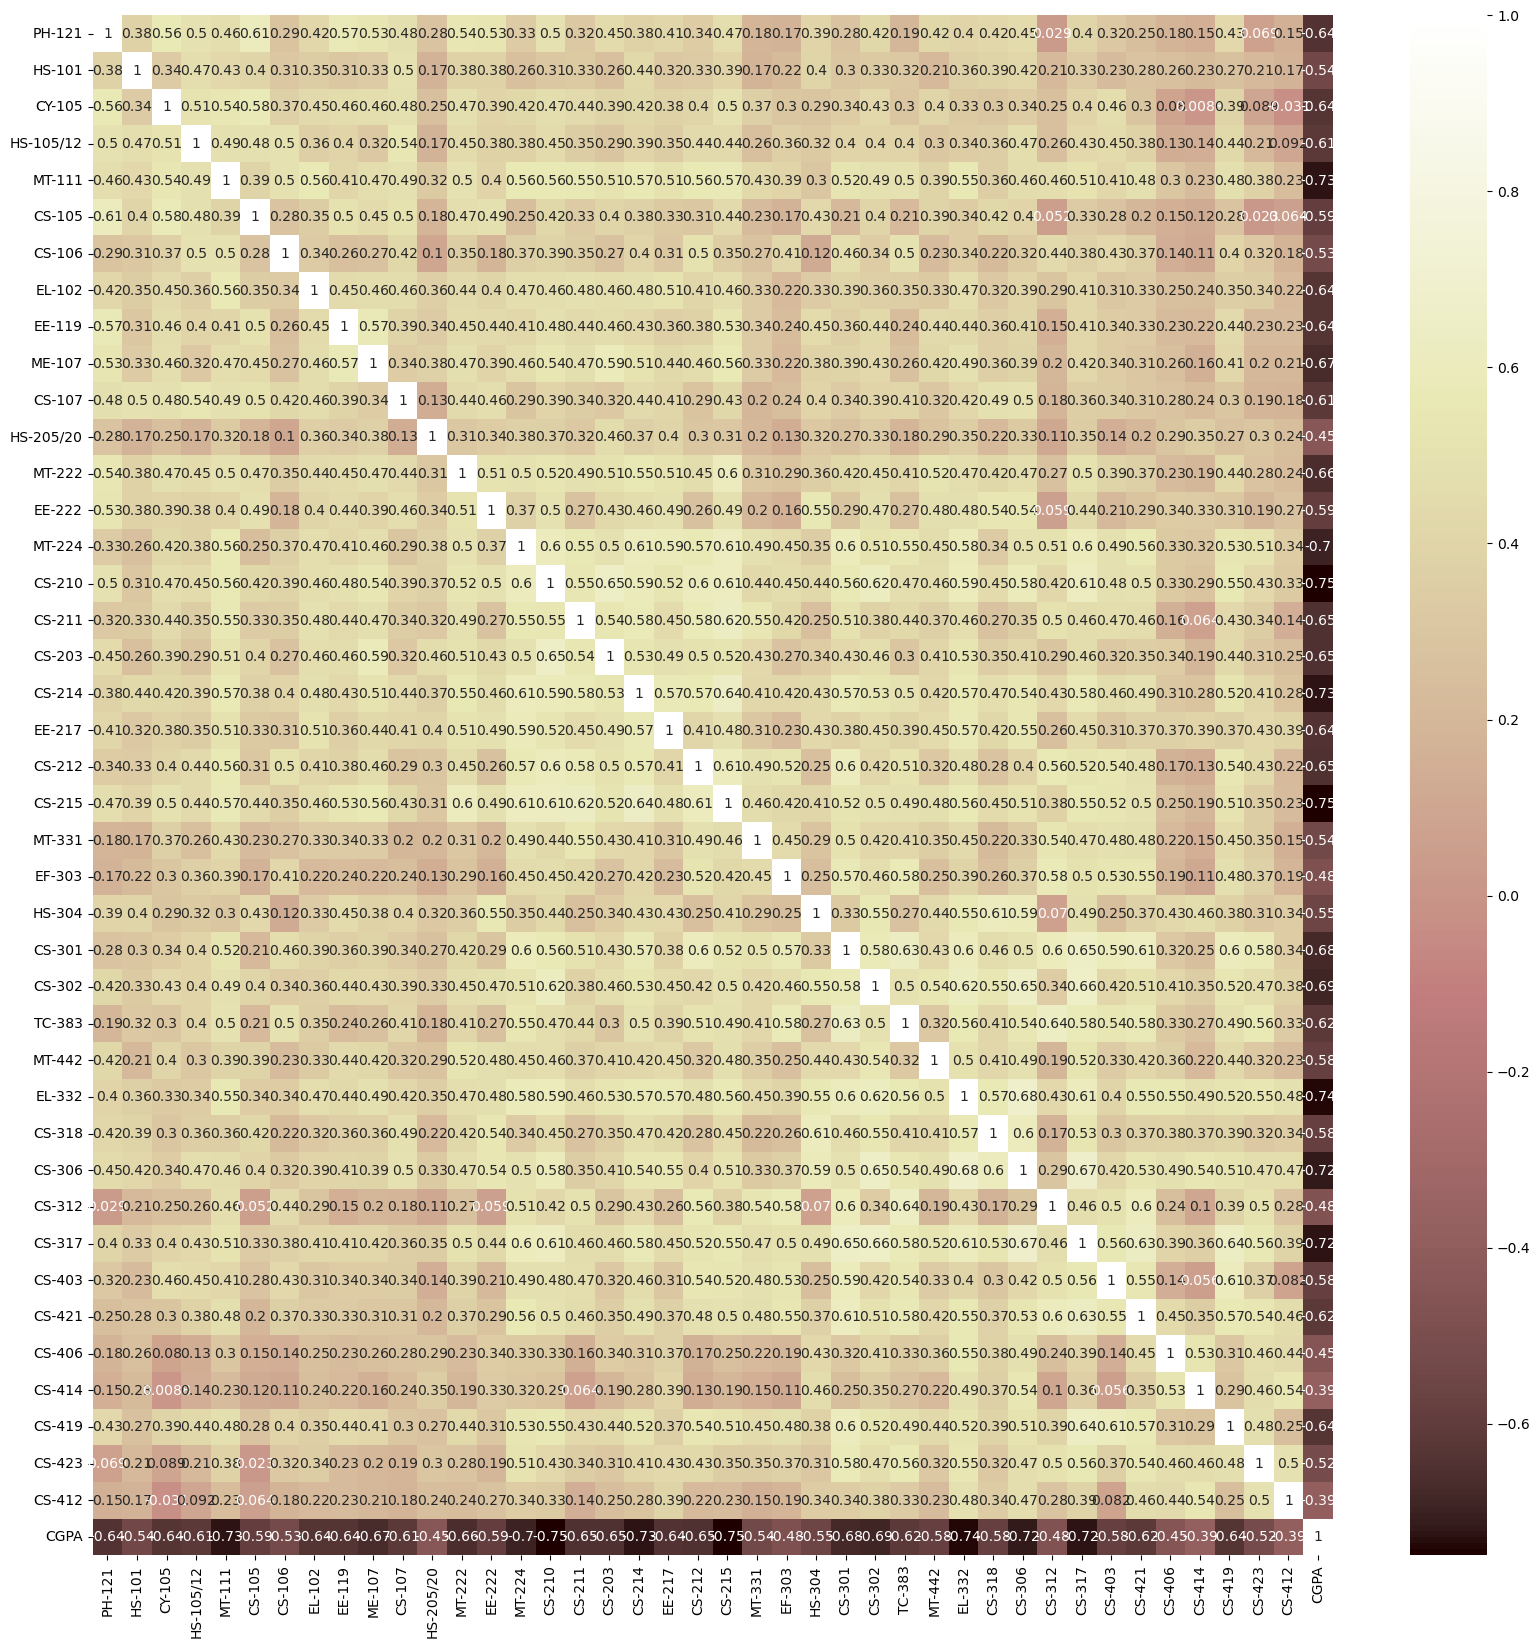

In [25]:
#checking of correlation with the heatmap
plt.figure(figsize=(20,20))
sns.heatmap(st.corr(),cmap='pink',annot=True)
plt.show()

Visualization of correlation through heatmap.
CGPA is negatively correlated with EL-332, CS-215 and CS-317.
It has positive correlation withHS-205/20,CS-414.
PH-121 is correlated with CS-105

In [26]:
#Top cgpa of student
st['CGPA'].max()

490.0

In [27]:
#bottom cgpa of student
st['CGPA'].min()

0.0

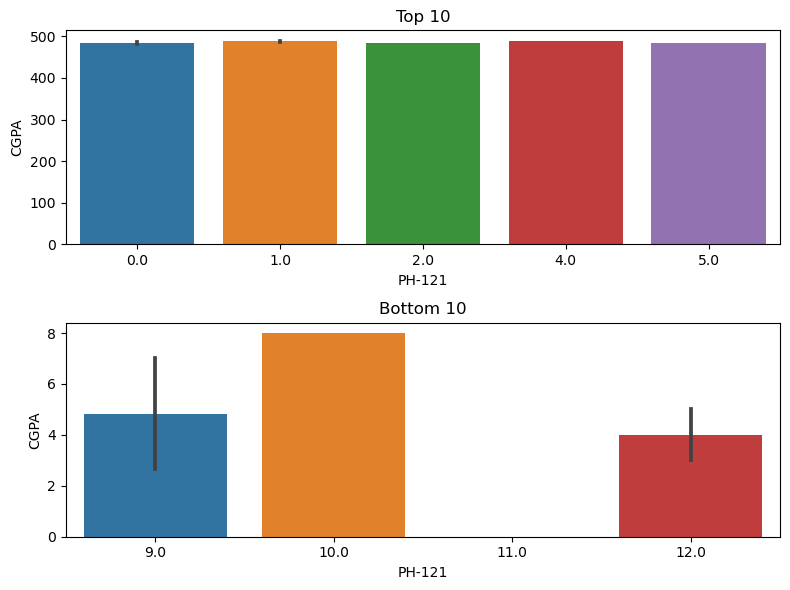

In [28]:
#checking top and bottom cgpa
top_10=st.sort_values('CGPA',ascending=False)
bottom_10=st.sort_values('CGPA',ascending=True)
fig,ax=plt.subplots(2,1,figsize=(8,6))

sns.barplot(top_10.iloc[:10],y='CGPA',x='PH-121',palette='tab10',ax=ax[0])
ax[0].set_title('Top 10')

sns.barplot(bottom_10.iloc[:10],y='CGPA',x='PH-121',palette='tab10',ax=ax[1])
ax[1].set_title('Bottom 10')
fig.tight_layout()
fig.show()


Top and bottom CGPA of ph-121.

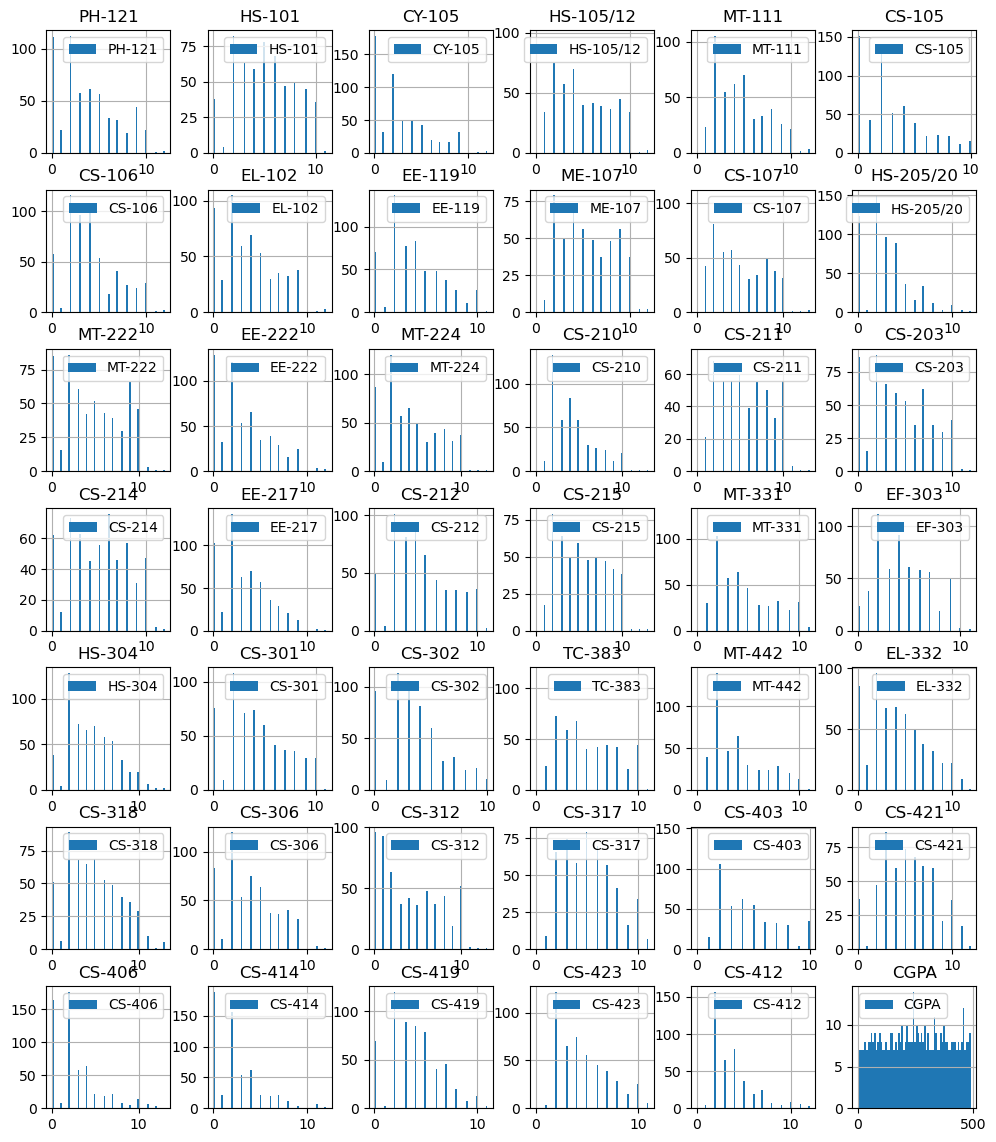

In [29]:
st.hist(bins=70, figsize=(12,14),legend=True)
plt.show()

Checking all the columns through histograph.

PH-121          Axes(0.125,0.814746;0.133621x0.0652542)
HS-101       Axes(0.285345,0.814746;0.133621x0.0652542)
CY-105        Axes(0.44569,0.814746;0.133621x0.0652542)
HS-105/12    Axes(0.606034,0.814746;0.133621x0.0652542)
MT-111       Axes(0.766379,0.814746;0.133621x0.0652542)
CS-105          Axes(0.125,0.736441;0.133621x0.0652542)
CS-106       Axes(0.285345,0.736441;0.133621x0.0652542)
EL-102        Axes(0.44569,0.736441;0.133621x0.0652542)
EE-119       Axes(0.606034,0.736441;0.133621x0.0652542)
ME-107       Axes(0.766379,0.736441;0.133621x0.0652542)
CS-107          Axes(0.125,0.658136;0.133621x0.0652542)
HS-205/20    Axes(0.285345,0.658136;0.133621x0.0652542)
MT-222        Axes(0.44569,0.658136;0.133621x0.0652542)
EE-222       Axes(0.606034,0.658136;0.133621x0.0652542)
MT-224       Axes(0.766379,0.658136;0.133621x0.0652542)
CS-210          Axes(0.125,0.579831;0.133621x0.0652542)
CS-211       Axes(0.285345,0.579831;0.133621x0.0652542)
CS-203        Axes(0.44569,0.579831;0.133621x0.0

<Figure size 1000x800 with 0 Axes>

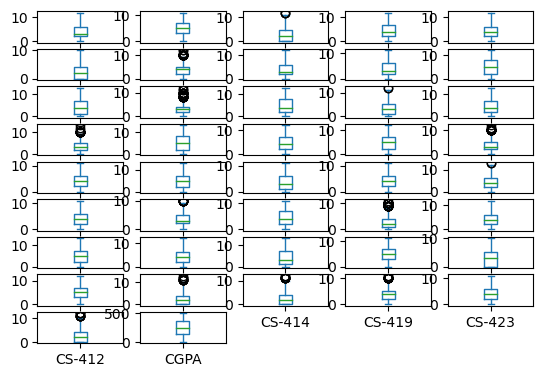

In [30]:
#checking for outliers
fig=plt.figure(figsize=(10,8))
st.plot(kind='box',subplots=True,layout=(10,5))

This shows presence of outliers.

In [34]:
#checking skewness
st.skew()

PH-121       0.549104
HS-101       0.053303
CY-105       0.982144
HS-105/12    0.324183
MT-111       0.481801
CS-105       0.930769
CS-106       0.631537
EL-102       0.497878
EE-119       0.568220
ME-107       0.104369
CS-107       0.414846
HS-205/20    0.886061
MT-222       0.186063
EE-222       0.759105
MT-224       0.416932
CS-210       0.709664
CS-211       0.105522
CS-203       0.264868
CS-214       0.027368
EE-217       0.712366
CS-212       0.388493
CS-215       0.150606
MT-331       0.627721
EF-303       0.327013
HS-304       0.488848
CS-301       0.387714
CS-302       0.575208
TC-383       0.331652
MT-442       0.861796
EL-332       0.438171
CS-318       0.319306
CS-306       0.403422
CS-312       0.433329
CS-317       0.134402
CS-403       0.618339
CS-421       0.095838
CS-406       1.325117
CS-414       1.292931
CS-419       0.449645
CS-423       0.491935
CS-412       1.117774
CGPA        -0.012061
dtype: float64

There is no skewness that means all are skewed to the right.

In [35]:
#distributing the data
x=st.iloc[:,0:-1]
y=st.iloc[:,-1]

In [36]:
#seperating independent and target variables
x=st.drop('CGPA',axis=1)
y=st['CGPA']
print('feature dimension',x.shape)
print('label dimension',y.shape)

feature dimension (571, 41)
label dimension (571,)


In [37]:
sl=StandardScaler()
x=sl.fit_transform(x)
x

array([[ 0.40040198,  1.77089951,  1.72226058, ...,  1.72089894,
        -0.32265105, -0.30322251],
       [-1.24205154,  1.4115592 ,  2.39744822, ...,  0.89929919,
         0.73212232,  0.08938532],
       [-1.24205154, -0.74448263, -0.97848996, ..., -1.56550004,
        -0.67424217, -1.08843816],
       ...,
       [-0.25657943, -1.82250355, -0.30330233, ...,  0.07769945,
        -0.67424217, -0.30322251],
       [-1.24205154, -0.38514232,  2.0598544 , ..., -0.33310042,
         0.3805312 ,  1.2672088 ],
       [ 0.72889268,  1.4115592 ,  2.0598544 , ...,  0.07769945,
         1.78689568,  2.05242445]])

# model buliding¶

In [38]:
from sklearn.metrics import r2_score
from sklearn import datasets
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import metrics
from sklearn.linear_model import Ridge, Lasso

In [39]:
maxAccu=0
maxRs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pre=lr.predict(x_test)
    acc=r2_score(y_test,pre)
    if acc>maxAccu:
        maxAccu=acc
        maxRs=i
print('Best accuracy',maxAccu,'at random state',maxRs)        
    

Best accuracy 0.960308359528593 at random state 72


In [40]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=maxRs)

In [41]:
#Ridge
rd=Ridge()
rd.fit(x_train,y_train)
pre=rd.predict(x_test)
pred=rd.predict(x_train)
print("R2 score:",r2_score(y_train,pred))
print("R2 score training data:",r2_score(y_test,pre)*100)
print('Mean absolute error:',mean_absolute_error(y_test,pre))
print('Mean square error:',mean_squared_error(y_test,pre))
print('Root mean square error:',np.sqrt(mean_squared_error(y_test,pre)))

R2 score: 0.927507482500558
R2 score training data: 96.05110219575141
Mean absolute error: 23.005193504060916
Mean square error: 816.3284169810072
Root mean square error: 28.57146158286284


In [42]:
#support vector regression
svr=SVR()
svr.fit(x_train,y_train)
pre=svr.predict(x_test)
pred=svr.predict(x_train)
print(r2_score(y_train,pred))
print(r2_score(y_test,pre)*100)
print('Mean absolute error:',mean_absolute_error(y_test,pre))
print('Mean square error:',mean_squared_error(y_test,pre))
print('Root mean square error:',np.sqrt(mean_squared_error(y_test,pre)))

0.41616848467459133
42.510651363914555
Mean absolute error: 92.85538524595222
Mean square error: 11884.376677176355
Root mean square error: 109.01548824445247


In [43]:
#Randomforest
ra=RandomForestRegressor()
ra.fit(x_train,y_train)
pre=ra.predict(x_test)
pred=ra.predict(x_train)
print(r2_score(y_train,pred))
print(r2_score(y_test,pre)*100)
print('Mean absolute error:',mean_absolute_error(y_test,pre))
print('Mean square error:',mean_squared_error(y_test,pre))
print('Root mean square error:',np.sqrt(mean_squared_error(y_test,pre)))

0.9884114513165473
95.99064739595843
Mean absolute error: 22.995465116279068
Mean square error: 828.8258209302328
Root mean square error: 28.7893351943082


In [44]:
#KNN
knn=KNN()
knn.fit(x_train,y_train)
pre=knn.predict(x_test)
pred=knn.predict(x_train)
print(r2_score(y_train,pred))
print(r2_score(y_test,pre)*100)
print('Mean absolute error:',mean_absolute_error(y_test,pre))
print('Mean square error:',mean_squared_error(y_test,pre))
print('Root mean square error:',np.sqrt(mean_squared_error(y_test,pre)))

0.9323028190640672
97.02970950805954
Mean absolute error: 19.263953488372092
Mean square error: 614.0276744186046
Root mean square error: 24.7795818047562


In [45]:
#Lasso
las=Lasso()
las.fit(x_train,y_train)
pre=las.predict(x_test)
pred=las.predict(x_train)
print(r2_score(y_train,pred))
print(r2_score(y_test,pre)*100)
print('Mean absolute error:',mean_absolute_error(y_test,pre))
print('Mean square error:',mean_squared_error(y_test,pre))
print('Root mean square error:',np.sqrt(mean_squared_error(y_test,pre)))

0.9263203577497041
96.35884874132219
Mean absolute error: 21.958888320760135
Mean square error: 752.710095406092
Root mean square error: 27.435562604147414


In [46]:
#Extratrees regressor
ex=ExtraTreesRegressor()
ex.fit(x_train,y_train)
pre=ex.predict(x_test)
pred=ex.predict(x_train)
print(r2_score(y_train,pred))
print(r2_score(y_test,pre)*100)
print('Mean absolute error:',mean_absolute_error(y_test,pre))
print('Mean square error:',mean_squared_error(y_test,pre))
print('Root mean square error:',np.sqrt(mean_squared_error(y_test,pre)))

1.0
97.06068771736844
Mean absolute error: 19.75604651162791
Mean square error: 607.6237627906977
Root mean square error: 24.650025614402466


In [47]:
#Linear regression
lr=LinearRegression()
lr.fit(x_train,y_train)
pre=lr.predict(x_test)
pred=lr.predict(x_train)
print(r2_score(y_train,pred))
print(r2_score(y_test,pre)*100)
print('Mean absolute error:',mean_absolute_error(y_test,pre))
print('Mean square error:',mean_squared_error(y_test,pre))
print('Root mean square error:',np.sqrt(mean_squared_error(y_test,pre)))

0.9275084622398436
96.03083595285929
Mean absolute error: 23.071555060165334
Mean square error: 820.5179176463499
Root mean square error: 28.644683933434315


# Cross Validation

In [48]:
# Cv score for Ridge
score= cross_val_score(rd,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print('difference between R2score and cross validation',(r2_score(y_test,pre)-score.mean())*100)

[0.86620978 0.91721857 0.93778588 0.95992077 0.88214245]
0.9126554917403249
difference between R2score and cross validation 4.765286778826805


In [49]:
# Cv score for support vector
score= cross_val_score(svr,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print('difference between R2score and cross validation',(r2_score(y_test,pre)-score.mean())*100)

[0.45041631 0.48849157 0.47436234 0.46502247 0.41942194]
0.45954292855577383
difference between R2score and cross validation 50.07654309728191


In [50]:
# Cv score for Random forest
score= cross_val_score(ra,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print('difference between R2score and cross validation',(r2_score(y_test,pre)-score.mean())*100)

[0.8797961  0.91983967 0.94846243 0.94863943 0.8507989 ]
0.909507307249189
difference between R2score and cross validation 5.08010522794039


In [51]:
# Cv score for KNN
score= cross_val_score(knn,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print('difference between R2score and cross validation',(r2_score(y_test,pre)-score.mean())*100)

[0.89209873 0.90004551 0.93343472 0.95884425 0.88793852]
0.9144723466596766
difference between R2score and cross validation 4.5836012868916365


In [52]:
# Cv score for lasso
score= cross_val_score(las,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print('difference between R2score and cross validation',(r2_score(y_test,pre)-score.mean())*100)

[0.87247148 0.91701271 0.93808222 0.96406011 0.87715438]
0.913756177726069
difference between R2score and cross validation 4.655218180252396


In [53]:
# Cv score for Extatrees regressor
score= cross_val_score(ex,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print('difference between R2score and cross validation',(r2_score(y_test,pre)-score.mean())*100)

[0.8987264  0.93292814 0.95337095 0.96150308 0.90367226]
0.9300401671389478
difference between R2score and cross validation 3.0268192389645177


In [54]:
# Cv score for Linear regression
score= cross_val_score(lr,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print('difference between R2score and cross validation',(r2_score(y_test,pre)-score.mean())*100)

[0.86594051 0.91722286 0.93761855 0.95976071 0.88204525]
0.9125175762004366
difference between R2score and cross validation 4.779078332815634


ExtraTrees regressor is our best model as the difference between R2 score and cross validation score is least

# Setting Paramaters

In [55]:
from sklearn import datasets
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [56]:
para={'n_estimators':[50,80,100],
      'criterion':['squared_error','poisson','absolute_error'],
     'n_jobs':['int',None],
     'ccp_alpha':[0.0]}
ex_cv=GridSearchCV(ex,para,cv=5)
ex_cv.fit(x_train,y_train)
print(ex_cv.best_params_)

{'ccp_alpha': 0.0, 'criterion': 'absolute_error', 'n_estimators': 80, 'n_jobs': None}


In [63]:
ex_new=ExtraTreesRegressor(criterion='absolute_error',ccp_alpha=0.0,n_jobs=None,n_estimators=80)
ex_new.fit(x_train,y_train)
y_pred_new=ex_new.predict(x_test)
print(metrics.r2_score(y_test,y_pred_new))

0.9680765114721973


In [64]:
ex_new.fit(x_train,y_train)
pre=ex_new.predict(x_test)
print('R2 score:',r2_score(y_test,pre))
print('mean absolute error:',mean_absolute_error(y_test,pre))
print('mean square error;',mean_squared_error(y_test,pre))
print('root mean squre error:',np.sqrt(mean_squared_error(y_test,pre)))

R2 score: 0.9688771840153984
mean absolute error: 20.433066860465118
mean square error; 643.3805168968024
root mean squre error: 25.364946617266956


In [65]:
import joblib
import pickle
filename="Student Grade.pkl"
pickle.dump(ex_new,open(filename,'wb'))

In [66]:
#predicting the save model
load_m=pickle.load(open('Student Grade.pkl','rb'))

In [67]:
result=load_m.score(x_test,y_test)
print(result*100)

96.88771840153983


In [68]:
con=pd.DataFrame([load_m.predict(x_test)[:],y_test[:]],index=['predicted','orginal'])
con

,0,1,2,3,4,5,6,7,8,9,...,162,163,164,165,166,167,168,169,170,171
predicted,90.7375,368.3375,280.1875,120.7625,135.1375,416.45,320.5,470.85,347.8875,466.9375,...,166.3625,157.125,230.35,181.725,118.75,74.425,391.4625,245.6875,66.525,416.1625
orginal,85.0000,394.0000,272.0000,103.0000,89.0000,433.00,335.0,484.00,363.0000,480.0000,...,135.0000,122.000,215.00,190.000,90.00,68.000,391.0000,256.0000,62.000,419.0000
